### Task 1: Calculate Global Moran's I for wasted votes in Dane County, WI for Democrats in presidential election 2020

The below snippet is outsourced from Geopandas documentation - <a href = "https://geopandas.org/en/stable/getting_started/install.html"> click here </a>

In [1]:
# helps in reading geojson files without resorting to value errors
import os
os.environ["USE_PYGEOS"] = "0"
import geopandas as gpd

In [2]:
# import all required libraries
import esda, json, os
import pandas as pd
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely import Point
%matplotlib inline

Downloaded data from <a href = "https://data-ltsb.opendata.arcgis.com/datasets/LTSB::2012-2020-election-data-with-2020-wards/explore"> Wisconsin State Legislature Website </a>

<AxesSubplot:>

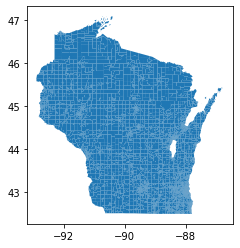

In [3]:
# reading geojson downloaded from opendata portal
wi_gdf = gpd.read_file(r"2012-2020_Election_Data_with_2020_Wards.geojson")
wi_gdf.plot()

In [30]:
# selecting Dane County to perform calculations
dane_county= wi_gdf[(wi_gdf['CNTY_NAME']=='Dane')]
dane_county.head(1)

OBJECTID           GEOID CNTY_FIPS CNTY_NAME COUSUBFP    MCD_FIPS  \
818       819  55025008750001     55025      Dane    00875  5502500875   

    MCD_NAME CTV            LABEL LSAD  ... WSASCT12 WSSTOT12 WSSDEM12  \
818   Albion   T  Albion - T 0001   43  ...      1.0      0.0      0.0   

    WSSREP12 WSSREP212 WSSCON12  WSSIND12  WSSSCT12  WSSAME12  \
818      0.0       0.0      0.0       0.0       0.0       0.0   

                                              geometry  
818  POLYGON ((-89.04186 42.86069, -89.04260 42.861...  

[1 rows x 275 columns]

Text(0.5, 1.0, 'Election wards 2022 Dane County, WI')

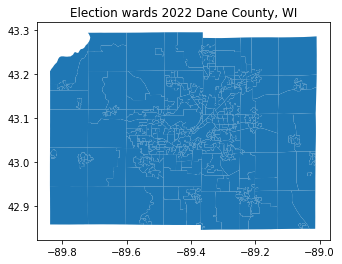

In [31]:
dane_county.plot()
plt.title("Election wards 2022 Dane County, WI")

In [32]:
# replacing all NaN values with zero
#dane_county = dane_county.fillna(0)
print(pd.isnull(dane_county['PREDEM20']).sum())
print(pd.isnull(dane_county['PREREP20']).sum())
print(pd.isnull(dane_county['PRETOT20']).sum())
dane_county['PREDEM20'].fillna((dane_county['PREDEM20'].median()), inplace=True) 
dane_county['PREREP20'].fillna((dane_county['PREREP20'].median()), inplace=True) 
dane_county['PRETOT20'].fillna((dane_county['PRETOT20'].median()), inplace=True)

7
7
7


C:\Users\Sidrcs\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<b>Variables in each voting district (WARD)</b>
<ul>
<li>Democratic Votes: <b>PREDEM20</b></li>
<li>Republican Votes: <b>PREREP20</b></li>
<li>Total Votes: <b>PRETOT20</b></li>
</ul>

In [33]:
# calculates Democrat voting percentage for a given ward based on polled votes
def dem_voters(row):
    if row['PRETOT20'] != 0:
        result = (row['PREDEM20']/row['PRETOT20'])*100
        return round(result,2)
    else:
        return 0

# calculates Republican voting percentage for a given ward based on polled votes
def rep_voters(row):
    if row['PRETOT20'] != 0:
        result = (row['PREREP20']/row['PRETOT20'])*100
        return round(result,2)
    else: 
        return 0

In [34]:
dane_county['DEM_PCT'] = dane_county.apply(lambda row: dem_voters(row), axis = 1)
dane_county['REP_PCT'] = dane_county.apply(lambda row: rep_voters(row), axis = 1)

C:\Users\Sidrcs\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


What is wasted vote - <a href = "https://ballotpedia.org/Efficiency_gap"> Ballotpedia Blog </a>

In [35]:
count = (dane_county['DEM_PCT'] < 50).sum()
print(count)

58


In [36]:
# calculates Democrat wasted votes for a given ward based on total votes
def dem_wasted_votes(row):
    # if Democrats win, then any vote above 50% is considered as a wasted vote
    if row['DEM_PCT'] >= 50:
        # calculates excess percentage of votes received in that ward
        excess_pct = (row['DEM_PCT']-50)
        # counting ratio of excess
        wasted_votes_ratio = excess_pct
        return round(wasted_votes_ratio)
    else: 
        wasted_votes_ratio = row['DEM_PCT']
        return round(wasted_votes_ratio)
    
dane_county['DEM_WST_VOT'] = dane_county.apply(lambda row: dem_wasted_votes(row), axis = 1)

In [37]:
# printing data frame to understand calculations
dane_df = dane_county[['GEOID', 'CNTY_NAME', 'MCD_NAME', 'PREDEM20', \
                       'PREREP20', 'PRETOT20', 'DEM_PCT', 'REP_PCT', \
                       'DEM_WST_VOT']]
dane_df

GEOID CNTY_NAME     MCD_NAME  PREDEM20  PREREP20  PRETOT20  \
818   55025008750001      Dane       Albion     323.0     288.0     624.0   
819   55025008750002      Dane       Albion     340.0     302.0     654.0   
820   55025063000001      Dane   Belleville     443.0     196.0     655.0   
821   55025063000002      Dane   Belleville     429.0     189.0     630.0   
822   55025070250001      Dane        Berry     176.0     135.0     316.0   
...              ...       ...          ...       ...       ...       ...   
1301  55025515750022      Dane    Middleton     396.0     159.0     597.0   
1302  55025776750016      Dane    Stoughton     396.0     159.0     597.0   
1303  55025786000027      Dane  Sun Prairie     396.0     159.0     597.0   
1304  55025877250010      Dane      Windsor     354.0     202.0     564.0   
1305  55025894500001      Dane         York     242.0     208.0     457.0   

      DEM_PCT  REP_PCT  DEM_WST_VOT  
818     51.76    46.15            2  
819     51.99    46.18            2  
820     67.63    29.92           18  
821     68.10    30.00           18  
822     55.70    42.72            6  
...       ...      ...          ...  
1301    66.33    26.63           16  
1302    66.33    26.63           16  
1303    66.33    26.63           16  
1304    62.77    35.82           13  
1305    52.95    45.51            3  

[488 rows x 9 columns]

In [38]:
y = dane_county['DEM_WST_VOT'] # target variable
wq =  lps.weights.Queen.from_dataframe(dane_county) # compute the spatial weights
wq.transform = 'r' # spatial weights require that the matrix is row-standardized 
np.random.seed(12345)
mi = esda.moran.Moran(y, wq)
mi.I

C:\Users\Sidrcs\anaconda3\lib\site-packages\libpysal\weights\_contW_lists.py:23: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if shape.type.lower() == "polygon":
C:\Users\Sidrcs\anaconda3\lib\site-packages\libpysal\weights\_contW_lists.py:26: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif shape.type.lower() == "linestring":
C:\Users\Sidrcs\anaconda3\lib\site-packages\libpysal\weights\_contW_lists.py:28: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif shape.type.lower() == "multilinestring":
C:\Users\Sidrcs\anaconda3\lib\site-packages\libpysal\weights\_contW_lists.py:30: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use th

0.4415608160871295

Text(0.5, 0, "Moran's I")

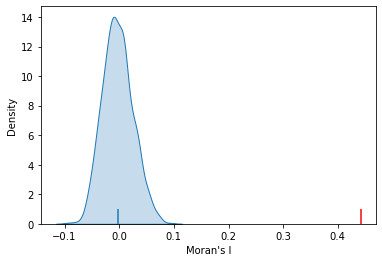

In [39]:
import seaborn as sbn
sbn.kdeplot(mi.sim, fill=True)
plt.vlines(mi.I, 0, 1, color='r') # observed value
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

### Task 2: Calculation Local Moran's I for Dane County, WI - Hotspots & Coldspots

The code below is borrowed from PySAL documentation - <a href = "https://pysal.org/esda/notebooks/spatialautocorrelation.html"> click here </a>

C:\Users\Sidrcs\anaconda3\lib\site-packages\libpysal\weights\_contW_lists.py:23: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if shape.type.lower() == "polygon":
C:\Users\Sidrcs\anaconda3\lib\site-packages\libpysal\weights\_contW_lists.py:26: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif shape.type.lower() == "linestring":
C:\Users\Sidrcs\anaconda3\lib\site-packages\libpysal\weights\_contW_lists.py:28: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif shape.type.lower() == "multilinestring":
C:\Users\Sidrcs\anaconda3\lib\site-packages\libpysal\weights\_contW_lists.py:30: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use th

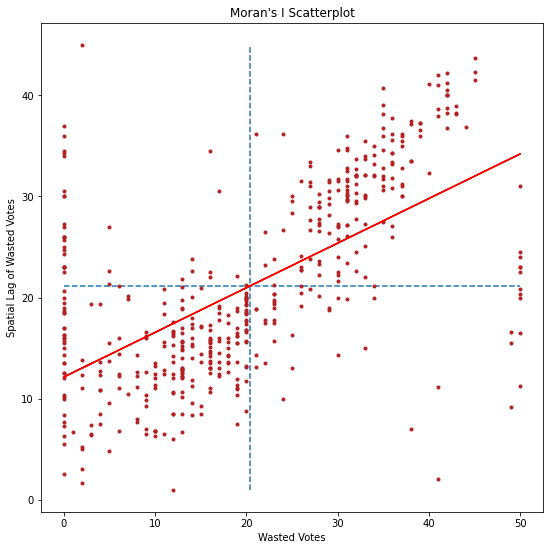

In [40]:
y = dane_county['DEM_WST_VOT'] # target variable
wq = lps.weights.Queen.from_dataframe(dane_county) # compute the spatial weights
wq.transform = 'r' # spatial weights require that the matrix is row-standardized 
np.random.seed(12345)
lag_wasted_votes = lps.weights.lag_spatial(wq, dane_county['DEM_WST_VOT'])
wasted_votes = dane_county['DEM_WST_VOT']
b, a = np.polyfit(wasted_votes, lag_wasted_votes, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(wasted_votes, lag_wasted_votes, '.', color='firebrick')

 # dashed vert at mean of wasted votes
plt.vlines(wasted_votes.mean(), lag_wasted_votes.min(), lag_wasted_votes.max(), linestyle='--')
 # dashed horizontal at mean lagged wasted votes
plt.hlines(lag_wasted_votes.mean(), wasted_votes.min(), wasted_votes.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(wasted_votes, a + b*wasted_votes, 'r')
plt.title("Moran's I Scatterplot")
plt.ylabel('Spatial Lag of Wasted Votes')
plt.xlabel('Wasted Votes')
plt.show()

In [41]:
li = esda.moran.Moran_Local(y, wq)

In [42]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([3, 3, 0, 0, 3, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 2, 4, 3, 3, 3, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 3,

In [43]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

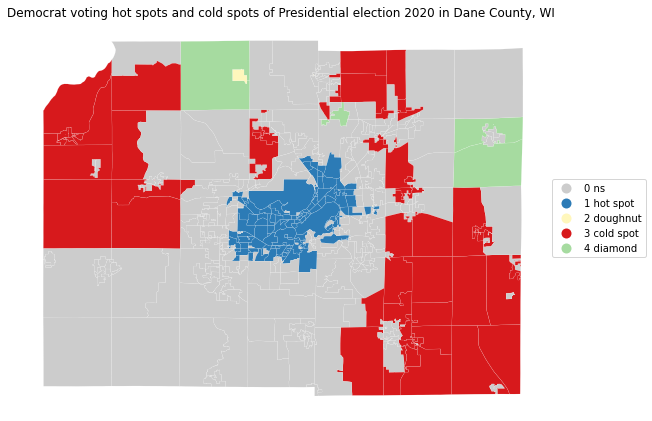

In [44]:
df = dane_county
from matplotlib import colors
hmap = colors.ListedColormap([ '#cccccc', '#2c7bb6', '#fff7bc', '#d7191c', '#a6dba0'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_axis_off()
plt.title('Democrat voting hot spots and cold spots of Presidential election 2020 in Dane County, WI ')
plt.tight_layout()

### Task 3:

In [154]:
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
import matplotlib as mpl

C:\Users\Sidrcs\AppData\Local\Temp/ipykernel_15032/3170509294.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  austin_gdf.centroid.plot(ax=ax, c='gray')


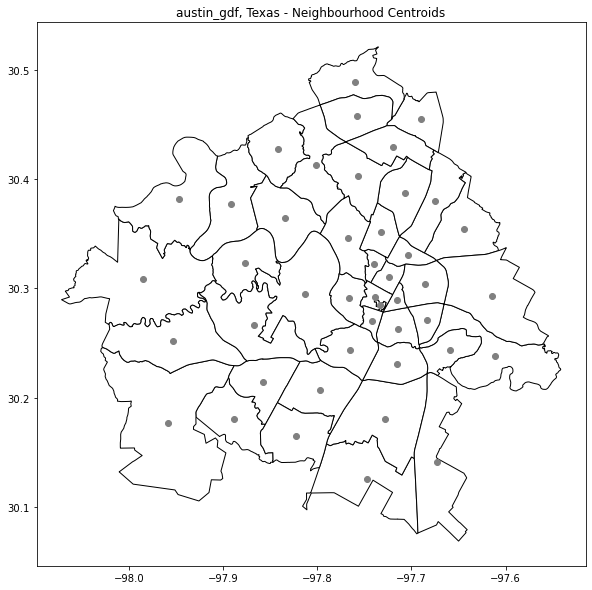

In [221]:
austin_gdf = gpd.read_file('neighbourhoods.geojson')
austin_gdf = austin_gdf.set_crs('EPSG:4326', allow_override=True)

fig, ax = plt.subplots(figsize=(10,10))
austin_gdf.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'white'})
austin_gdf.centroid.plot(ax=ax, c='gray')
plt.title('austin_gdf, Texas - Neighbourhood Centroids')
plt.show()

In [222]:
austin_gdf.head()

neighbourhood neighbourhood_group  \
0         78739                None   
1         78754                None   
2         78732                None   
3         78737                None   
4         78756                None   

                                            geometry  
0  MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...  
1  MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ...  
2  MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ...  
3  MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ...  
4  MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ...

In [223]:
# load the house listing point data using pandas 
bl_df = pd.read_csv('listings.csv.gz',compression='gzip')
bl_df.head()

id                        listing_url       scrape_id last_scraped  \
0  5456  https://www.airbnb.com/rooms/5456  20230316044216   2023-03-16   
1  5769  https://www.airbnb.com/rooms/5769  20230316044216   2023-03-16   
2  6413  https://www.airbnb.com/rooms/6413  20230316044216   2023-03-16   
3  6448  https://www.airbnb.com/rooms/6448  20230316044216   2023-03-16   
4  8502  https://www.airbnb.com/rooms/8502  20230316044216   2023-03-17   

            source                                               name  \
0      city scrape          Walk to 6th, Rainey St and Convention Ctr   
1  previous scrape                                     NW Austin Room   
2  previous scrape                      Gem of a Studio near Downtown   
3      city scrape  Secluded Studio @ Zilker - King Bed, Bright & ...   
4      city scrape                            Woodland Studio Lodging   

                                         description  \
0  Great central  location for walking to Convent...   
1  <b>The space</b><br />Looking for a comfortabl...   
2  Great studio apartment, perfect a single perso...   
3  Clean, private space with everything you need ...   
4  Studio rental on lower level of home located i...   

                               neighborhood_overview  \
0  My neighborhood is ideally located if you want...   
1  Quiet neighborhood with lots of trees and good...   
2  Travis Heights is one of the oldest neighborho...   
3  The neighborhood is fun and funky (but quiet)!...   
4                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/14084884/b5a3...     8028  ...   
1  https://a0.muscache.com/pictures/23822033/ac94...     8186  ...   
2  https://a0.muscache.com/pictures/miso/Hosting-...    13879  ...   
3  https://a0.muscache.com/pictures/4513152/4ffc1...    14156  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...    25298  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.82                   4.73                4.79   
1                        4.94                   4.76                4.92   
2                        4.98                   4.87                4.93   
3                        4.97                   4.97                4.90   
4                        4.86                   4.64                4.57   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              2   
1     NaN                f                              1   
2     NaN                f                              1   
3     NaN                t                              1   
4     NaN                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           2   
1                                           0   
2                                           1   
3                                           1   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            1   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              3.69  
1                                           0              1.75  
2                                           0              0.76  
3                                           0              2.10  
4                                           0              0.30  

[5 rows x 75 columns]

In [224]:
# read geometry from csv file and convert values in Point(XY) using Shapely.Point
geometry = [Point(xy) for xy in zip(bl_df.longitude, bl_df.latitude)]

# create a geodataframe based on dataframe and geometry
bl_gdf = gpd.GeoDataFrame(bl_df, geometry=geometry)
bl_gdf=bl_gdf.set_crs(crs='EPSG:4326')

#print columns
print(bl_gdf.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [225]:
bl_gdf.head(1)

id                        listing_url       scrape_id last_scraped  \
0  5456  https://www.airbnb.com/rooms/5456  20230316044216   2023-03-16   

        source                                       name  \
0  city scrape  Walk to 6th, Rainey St and Convention Ctr   

                                         description  \
0  Great central  location for walking to Convent...   

                               neighborhood_overview  \
0  My neighborhood is ideally located if you want...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/14084884/b5a3...     8028  ...   

  review_scores_location review_scores_value license instant_bookable  \
0                   4.73                4.79     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              2                                           2   

  calculated_host_listings_count_private_rooms  \
0                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  \
0                                           0              3.69   

                     geometry  
0  POINT (-97.73441 30.26057)  

[1 rows x 76 columns]

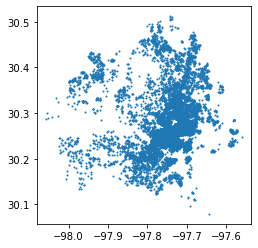

In [226]:
bl_gdf.plot(markersize = 1)
plt.show()

In [227]:
bl_gdf['price']=bl_gdf['price'].str.replace('$','')
bl_gdf['price']=bl_gdf['price'].str.replace(',','')
bl_gdf.head(1)

C:\Users\Sidrcs\AppData\Local\Temp/ipykernel_15032/694336847.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bl_gdf['price']=bl_gdf['price'].str.replace('$','')


id                        listing_url       scrape_id last_scraped  \
0  5456  https://www.airbnb.com/rooms/5456  20230316044216   2023-03-16   

        source                                       name  \
0  city scrape  Walk to 6th, Rainey St and Convention Ctr   

                                         description  \
0  Great central  location for walking to Convent...   

                               neighborhood_overview  \
0  My neighborhood is ideally located if you want...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/14084884/b5a3...     8028  ...   

  review_scores_location review_scores_value license instant_bookable  \
0                   4.73                4.79     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              2                                           2   

  calculated_host_listings_count_private_rooms  \
0                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  \
0                                           0              3.69   

                     geometry  
0  POINT (-97.73441 30.26057)  

[1 rows x 76 columns]

In [228]:
# check if NaNs are present in price
bl_gdf['price'] = bl_gdf['price'].astype('float32')
bl_gdf['price'].describe()

count    14368.000000
mean       310.029938
std        798.368774
min          0.000000
25%        108.000000
50%        180.000000
75%        320.000000
max      65155.000000
Name: price, dtype: float64

In [229]:
bl_gdf['neighbourhood_cleansed']

0        78702
1        78729
2        78704
3        78704
4        78741
         ...  
14363    78705
14364    78705
14365    78705
14366    78734
14367    78741
Name: neighbourhood_cleansed, Length: 14368, dtype: int64

In [232]:
# process the data and compute the median house price per neighborhood polygon  
# compute mean of other explainable variables 

sj_gdf = gpd.sjoin(austin, bl_gdf, how='inner', predicate='intersects', lsuffix='left', rsuffix='right')
median_price_gb = sj_gdf['price'].groupby([sj_gdf['neighbourhood_cleansed']]).median()
print(type(median_price_gb))
median_price_gb

<class 'pandas.core.series.Series'>


neighbourhood_cleansed
78701     279.0
78702     232.0
78703     250.0
78704     203.0
78705     141.0
78712    1035.0
78717     110.0
78719      90.0
78721     180.5
78722     170.0
78723     162.0
78724     135.0
78725     175.0
78726     154.0
78727     125.0
78728     109.0
78729     124.5
78730     245.0
78731     250.0
78732     350.0
78733     317.0
78734     297.0
78735     170.5
78736     183.5
78737     245.5
78738     158.0
78739     256.0
78741     131.0
78742     146.0
78744     130.5
78745     158.0
78746     385.0
78747     104.5
78748     128.0
78749     150.0
78750     127.0
78751     121.0
78752     110.5
78753     118.5
78754     100.0
78756     134.0
78757     149.0
78758     129.0
78759     140.0
Name: price, dtype: float32

neighbourhood neighbourhood_group  \
0          78739                None   
1          78754                None   
2          78732                None   
3          78737                None   
4          78756                None   
5          78747                None   
6          78751                None   
7          78712                None   
8          78738                None   
9          78725                None   
10         78757                None   
11         78728                None   
12         78744                None   
13         78736                None   
14         78702                None   
15         78741                None   
16         78719                None   
17         78742                None   
18         78722                None   
19         78703                None   
20         78717                None   
21         78749                None   
22         78730                None   
23         78745                None   
24         78731                None   
25         78748                None   
26         78729                None   
27         78752                None   
28         78724                None   
29         78704                None   
30         78753                None   
31         78705                None   
32         78758                None   
33         78746                None   
34         78759                None   
35         78726                None   
36         78733                None   
37         78723                None   
38         78750                None   
39         78735                None   
40         78721                None   
41         78727                None   
42         78734                None   
43         78701                None   

                                             geometry  median_pri  
0   MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...       256.0  
1   MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ...       100.0  
2   MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ...       350.0  
3   MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ...       245.5  
4   MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ...       134.0  
5   MULTIPOLYGON (((-97.73617 30.15986, -97.73591 ...       104.5  
6   MULTIPOLYGON (((-97.70677 30.32211, -97.70693 ...       121.0  
7   MULTIPOLYGON (((-97.73366 30.28536, -97.73295 ...      1035.0  
8   MULTIPOLYGON (((-98.00622 30.36079, -98.00424 ...       158.0  
9   MULTIPOLYGON (((-97.62338 30.26459, -97.62126 ...       175.0  
10  MULTIPOLYGON (((-97.73600 30.37857, -97.73356 ...       149.0  
11  MULTIPOLYGON (((-97.67106 30.47132, -97.67057 ...       109.0  
12  MULTIPOLYGON (((-97.68335 30.21432, -97.68331 ...       130.5  
13  MULTIPOLYGON (((-97.92212 30.29300, -97.91918 ...       183.5  
14  MULTIPOLYGON (((-97.69186 30.24848, -97.69172 ...       232.0  
15  MULTIPOLYGON (((-97.70652 30.25024, -97.70628 ...       131.0  
16  MULTIPOLYGON (((-97.65158 30.20143, -97.65287 ...        90.0  
17  MULTIPOLYGON (((-97.64043 30.25647, -97.64025 ...       146.0  
18  MULTIPOLYGON (((-97.70395 30.28257, -97.70555 ...       170.0  
19  MULTIPOLYGON (((-97.76606 30.31295, -97.76482 ...       250.0  
20  MULTIPOLYGON (((-97.70740 30.47482, -97.70753 ...       110.0  
21  MULTIPOLYGON (((-97.82331 30.23486, -97.82121 ...       150.0  
22  MULTIPOLYGON (((-97.84397 30.39357, -97.84183 ...       245.0  
23  MULTIPOLYGON (((-97.79207 30.23183, -97.78922 ...       158.0  
24  MULTIPOLYGON (((-97.74598 30.36138, -97.74526 ...       250.0  
25  MULTIPOLYGON (((-97.83150 30.19000, -97.82750 ...       128.0  
26  MULTIPOLYGON (((-97.72138 30.47358, -97.72091 ...       124.5  
27  MULTIPOLYGON (((-97.68634 30.33259, -97.68514 ...       110.5  
28  MULTIPOLYGON (((-97.56072 30.24903, -97.56097 ...       135.0  
29  MULTIPOLYGON (((-97.75447 30.26507, -97.75410 ...       203.0  
30  MULTIPOLYGON (((-97.67151 30.42438, -97.67123 ...       118.5  
31  MULTIPOLYGON (((-97.72

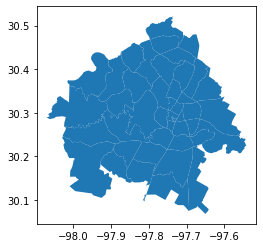

In [233]:
median_price_gb.rename("neighbourhood")
median_price_gb.index = median_price_gb.index.map(str) ## ensure the index key has the same data type of string
austin_gdf['neighbourhood'] = austin_gdf['neighbourhood'].astype('string')
austin_gdf = austin_gdf.join(median_price_gb, on='neighbourhood')
austin_gdf.rename(columns={'price': 'median_pri'}, inplace=True)
austin_gdf.plot()
austin_gdf

0
0


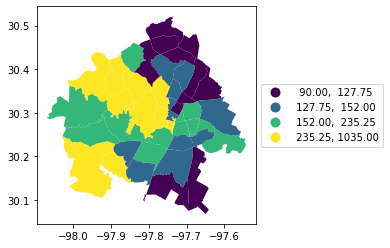

In [235]:
# check the neighborhood with 'NAN' values
# fill the NAN values with median prices
# More color maps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

print(pd.isnull(austin_gdf['median_pri']).sum())
austin_gdf['median_pri'].fillna((austin_gdf['median_pri'].median()), inplace=True)

ax = austin_gdf.plot(column='median_pri', scheme='QUANTILES', k=4, \
             cmap='viridis', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

print(pd.isnull(austin_gdf['median_pri']).sum())